# Ex 1

In [1]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

x = np.array([0.5, -0.2])   
y = 1.0                     

W1 = np.array([[0.3, -0.1],
               [0.2,  0.4]])
b1 = np.array([0.1, -0.2])

W2 = np.array([0.5, -0.3])
b2 = 0.2

eta = 0.1

# Camada oculta: z1 = W1 @ x + b1
z1 = np.dot(W1, x) + b1
h1 = tanh(z1)

# Camada de saída: u2 = W2 @ h1 + b2
u2 = np.dot(W2, h1) + b2
y_hat = tanh(u2)

print("z1 (pré-ativação oculta):", z1)
print("h1 (ativação oculta):", h1)
print("u2 (pré-ativação saída):", u2)
print("y_hat (saída predita):", y_hat)


z1 (pré-ativação oculta): [ 0.27 -0.18]
h1 (ativação oculta): [ 0.26362484 -0.17808087]
u2 (pré-ativação saída): 0.38523667817130075
y_hat (saída predita): 0.36724656264510797


In [2]:
L = (y - y_hat)**2  # como N=1, é só esse termo
print("Loss (MSE):", L)

Loss (MSE): 0.4003769124844312


In [3]:
# Gradiente da loss em relação à saída
dL_dyhat = -2 * (y - y_hat)

# Gradiente em relação a u2 (pré-ativação da saída)
dL_du2 = dL_dyhat * tanh_derivative(u2)

# Gradientes da camada de saída
dL_dW2 = dL_du2 * h1
dL_db2 = dL_du2

# Propagar erro para camada oculta
dL_dh1 = dL_du2 * W2
dL_dz1 = dL_dh1 * tanh_derivative(z1)

# Gradientes da camada oculta
dL_dW1 = np.outer(dL_dz1, x)
dL_db1 = dL_dz1

print("dL/dW2:", dL_dW2)
print("dL/db2:", dL_db2)
print("dL/dW1:\n", dL_dW1)
print("dL/db1:", dL_db1)


dL/dW2: [-0.28862383  0.19496791]
dL/db2: -1.0948279147135995
dL/dW1:
 [[-0.25468488  0.10187395]
 [ 0.15901618 -0.06360647]]
dL/db1: [-0.50936975  0.31803236]


In [4]:
# Atualização camada de saída
W2_new = W2 - eta * dL_dW2
b2_new = b2 - eta * dL_db2

# Atualização camada oculta
W1_new = W1 - eta * dL_dW1
b1_new = b1 - eta * dL_db1

print("Pesos W2 atualizados:", W2_new)
print("Bias b2 atualizado:", b2_new)
print("Pesos W1 atualizados:\n", W1_new)
print("Bias b1 atualizado:", b1_new)

Pesos W2 atualizados: [ 0.52886238 -0.31949679]
Bias b2 atualizado: 0.30948279147136
Pesos W1 atualizados:
 [[ 0.32546849 -0.1101874 ]
 [ 0.18409838  0.40636065]]
Bias b1 atualizado: [ 0.15093698 -0.23180324]


# Ex 2

Shape train: (800, 2) Shape test: (200, 2)


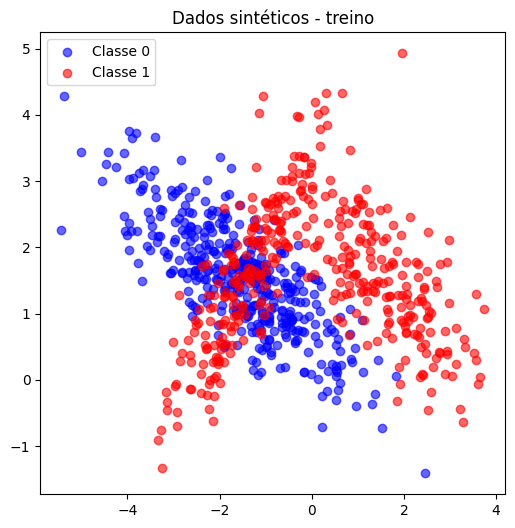

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

np.random.seed(42)

X0, y0 = make_classification(
    n_samples=500, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, n_classes=1, class_sep=1.5, random_state=42
)
y0 = np.zeros(500)

X1, y1 = make_classification(
    n_samples=500, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=2, n_classes=1, class_sep=1.5, random_state=24
)
y1 = np.ones(500)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape train:", X_train.shape, "Shape test:", X_test.shape)

plt.figure(figsize=(6,6))
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c="blue", label="Classe 0", alpha=0.6)
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c="red", label="Classe 1", alpha=0.6)
plt.legend()
plt.title("Dados sintéticos - treino")
plt.show()


In [6]:
class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.01):
        self.W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.b2 = np.zeros((1, output_dim))
        self.lr = lr

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def forward(self, X):
        # Input -> Hidden
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)  # ativação hidden

        # Hidden -> Output
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)  # saída binária

        return self.a2

    def compute_loss(self, y, y_hat):
        m = y.shape[0]
        eps = 1e-8
        loss = -(1/m) * np.sum(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))
        return loss

    def backward(self, X, y):
        m = X.shape[0]
        y = y.reshape(-1,1)

        dz2 = self.a2 - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)

        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * (1 - np.tanh(self.z1)**2)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=200):
        losses = []
        for epoch in range(epochs):
            y_hat = self.forward(X)
            loss = self.compute_loss(y, y_hat)
            losses.append(loss)
            self.backward(X, y)
            if epoch % 20 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return losses

    def predict(self, X):
        y_hat = self.forward(X)
        return (y_hat > 0.5).astype(int)


Epoch 0, Loss: 567.7506
Epoch 20, Loss: 557.7445
Epoch 40, Loss: 569.1947
Epoch 60, Loss: 584.5480
Epoch 80, Loss: 599.3487
Epoch 100, Loss: 612.2851
Epoch 120, Loss: 623.1005
Epoch 140, Loss: 631.9420
Epoch 160, Loss: 639.0938
Epoch 180, Loss: 644.8622
Epoch 200, Loss: 649.5270
Epoch 220, Loss: 653.3262
Epoch 240, Loss: 656.4540
Epoch 260, Loss: 659.0661
Epoch 280, Loss: 661.2852
Epoch 300, Loss: 663.2083
Epoch 320, Loss: 664.9121
Epoch 340, Loss: 666.4581
Epoch 360, Loss: 667.8965
Epoch 380, Loss: 669.2697
Epoch 400, Loss: 670.6143
Epoch 420, Loss: 671.9631
Epoch 440, Loss: 673.3455
Epoch 460, Loss: 674.7887
Epoch 480, Loss: 676.3163


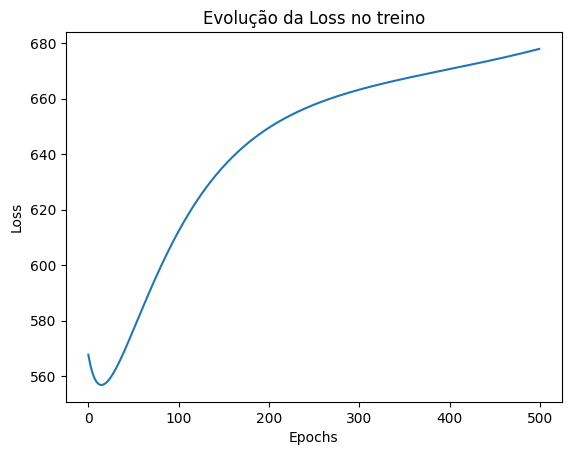

In [13]:
mlp = MLP(input_dim=2, hidden_dim=6, output_dim=1, lr=0.05)
losses = mlp.train(X_train, y_train, epochs=500)

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Evolução da Loss no treino")
plt.show()

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Acurácia no teste:", acc)
print("Matriz de confusão:\n", cm)

Acurácia no teste: 0.815
Matriz de confusão:
 [[83 13]
 [24 80]]


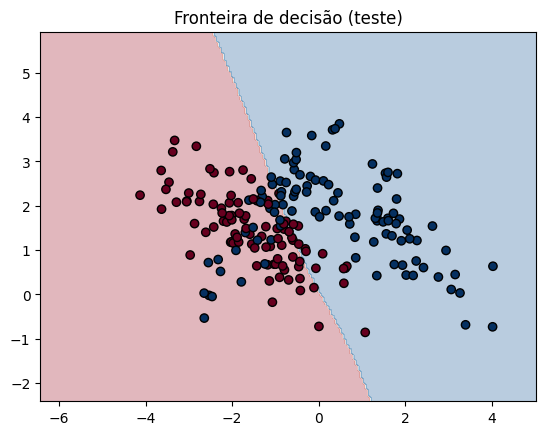

In [9]:
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = mlp.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.RdBu, edgecolors='k')
plt.title("Fronteira de decisão (teste)")
plt.show()